Acoustic Extinguisher Fire Dataset (Flame Extinction Fire Prediction)

Our aim is to determine which of the algorithms tested predicts best whether the flame will be extincted or not, based on the given dataset.

In [170]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_excel('acoustic_extinguisher_fire_dataset.xlsx')

#print(df.head())

# Print basic information about the dataset
df.info()

print('\nClass distribution:\n', df['STATUS'].value_counts())

df.describe()

df.describe(include=['object'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB

Class distribution:
 STATUS
0    8759
1    8683
Name: count, dtype: int64


,FUEL
count,17442
unique,4
top,gasoline
freq,5130


In order to do so, we plot different variables with themselves, in a method called multivariable analysis. We are then able to notice and convert categorial to numerial values, delete duplicates and even fill or replace any missing values.

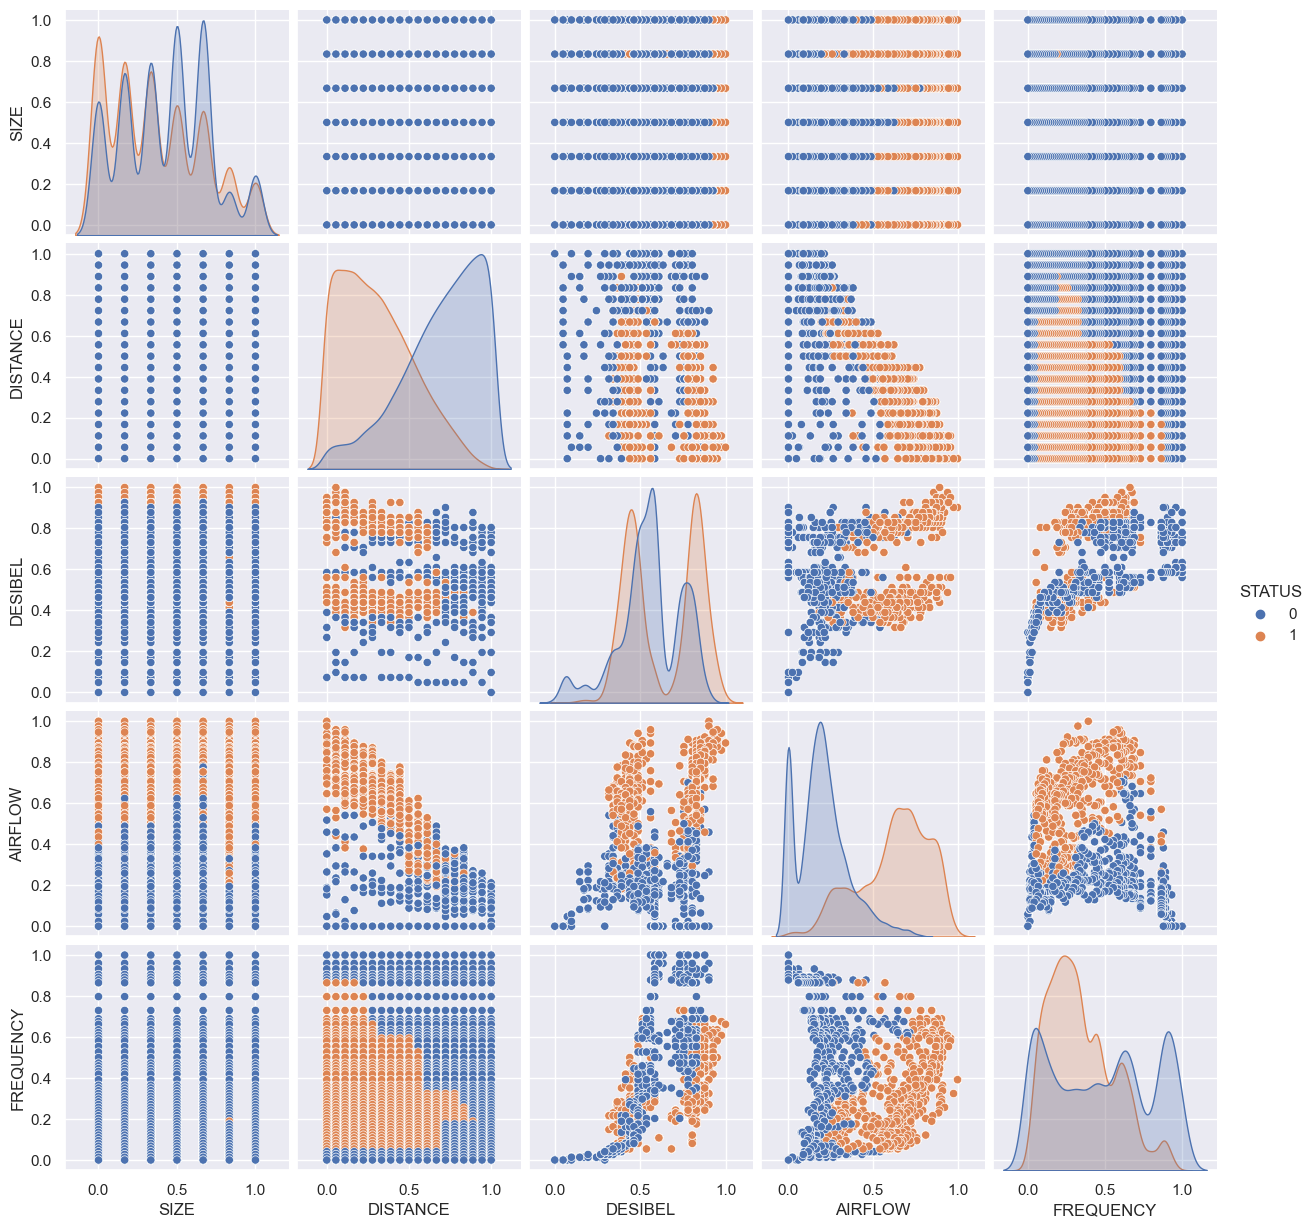

In [171]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['SIZE', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY']] = scaler.fit_transform(df[['SIZE', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY']])

from sklearn.model_selection import train_test_split

X = df.drop('STATUS', axis=1)
y = df['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import seaborn as sns

sns.pairplot(df, hue='STATUS')

<Axes: xlabel='FUEL', ylabel='Count'>

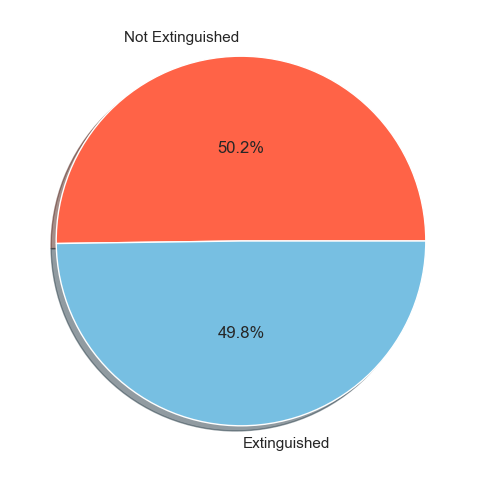

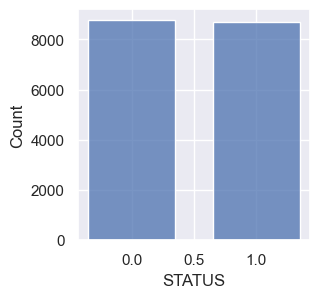

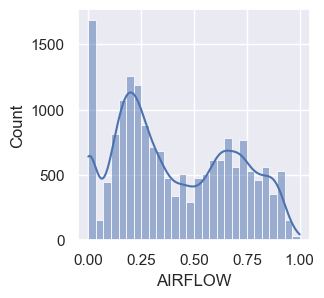

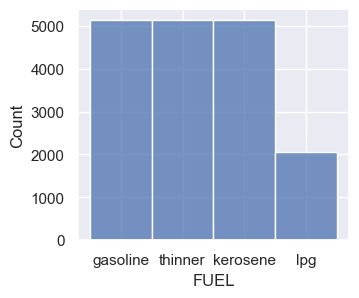

In [172]:
import matplotlib.pyplot as plt

classes = df['STATUS'].value_counts()
ax = plt.subplots(figsize=[10,6])
ax = plt.pie(x=classes,colors=['tomato','#77BFE2'] ,autopct="%.1f%%", labels=['Not Extinguished', 'Extinguished'], pctdistance=0.5,shadow=True )

plt.figure(figsize=(3,3))
sns.histplot(df.STATUS,discrete=True,stat='count',shrink=0.7)

plt.figure(figsize=(3,3))
sns.histplot(df.AIRFLOW, kde=True)

plt.figure(figsize=(3.5,3))
sns.histplot(df.FUEL)

<Axes: xlabel='STATUS', ylabel='AIRFLOW'>

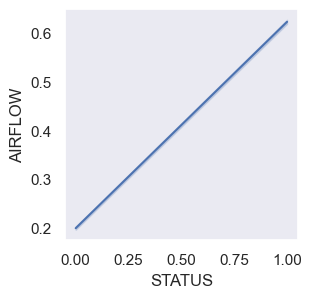

In [173]:

plt.figure(figsize=(3,3))
plt.grid(False)
sns.lineplot(x='STATUS', y='AIRFLOW', data=df)

As we can see the more the airflow the more likely it is to extinguish the flame

We start by clearing the dataset of columns and variables that are not relevant to the prediction.

no duplicates
SIZE
Skewness: 0.27869986365818017


<Figure size 300x300 with 0 Axes>

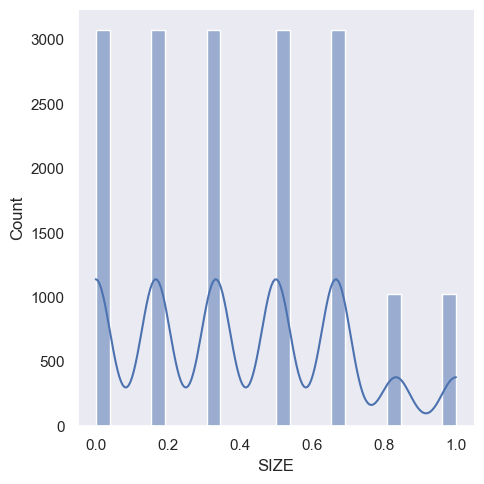

FUEL
Skewness: 0.20959140221588837


<Figure size 300x300 with 0 Axes>

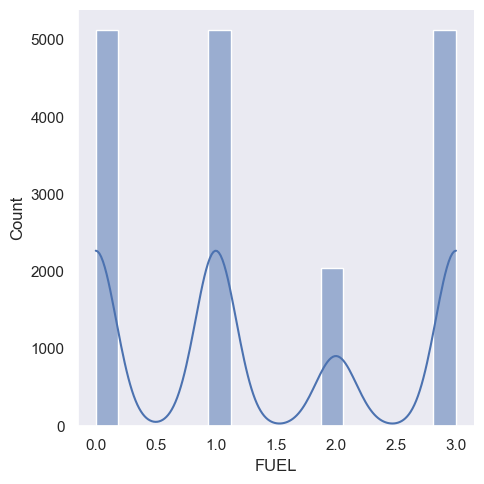

DISTANCE
Skewness: 1.7350452309722133e-16


<Figure size 300x300 with 0 Axes>

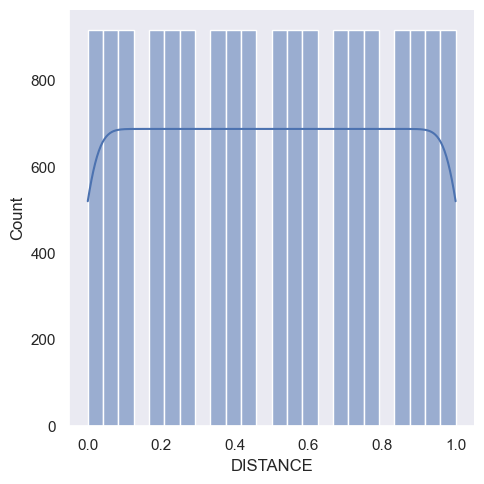

DESIBEL
Skewness: -0.17903195807889302


<Figure size 300x300 with 0 Axes>

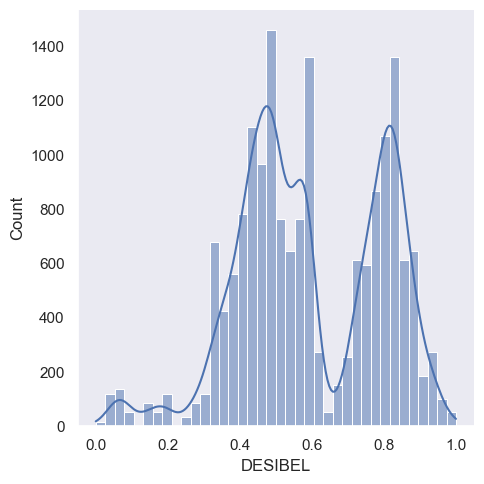

AIRFLOW
Skewness: 0.24434745944124112


<Figure size 300x300 with 0 Axes>

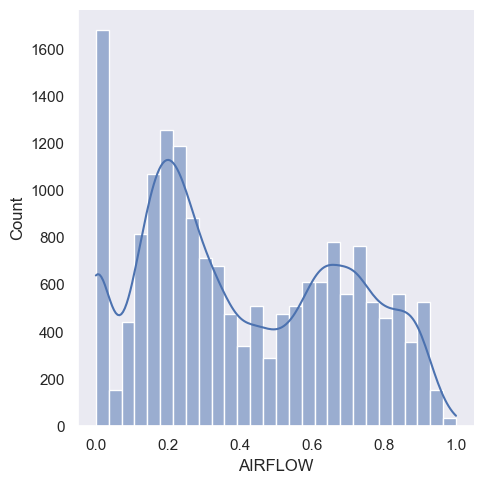

FREQUENCY
Skewness: 0.43485489163496016


<Figure size 300x300 with 0 Axes>

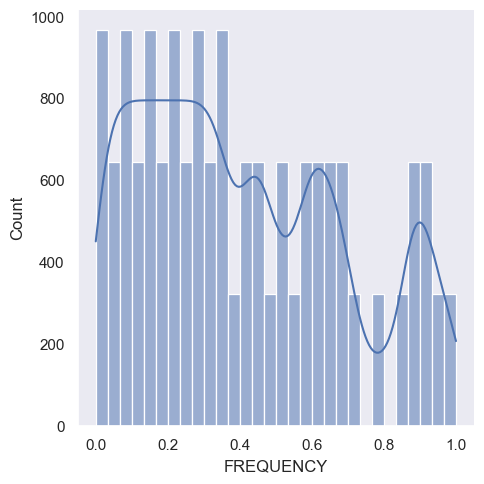

STATUS
Skewness: 0.008714679678955612


<Figure size 300x300 with 0 Axes>

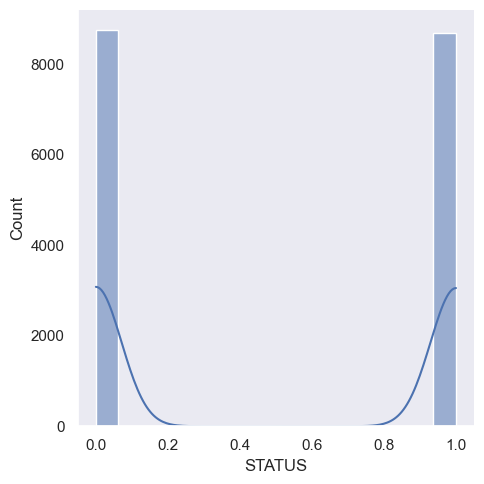

In [174]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder()
df["FUEL"] = ord_encoder.fit_transform(df[["FUEL"]])
ord_encoder.categories_

df.isnull().sum()

if(df.duplicated().any()==0):
    print("no duplicates")

df.skew()

from scipy.stats import skew
for column in df:
    print(column)
    print(f"Skewness: {skew(df[column])}")
    plt.figure(figsize=(3,3))
    sns.displot(df[column], kde=True)
    plt.grid(False)
    plt.show()

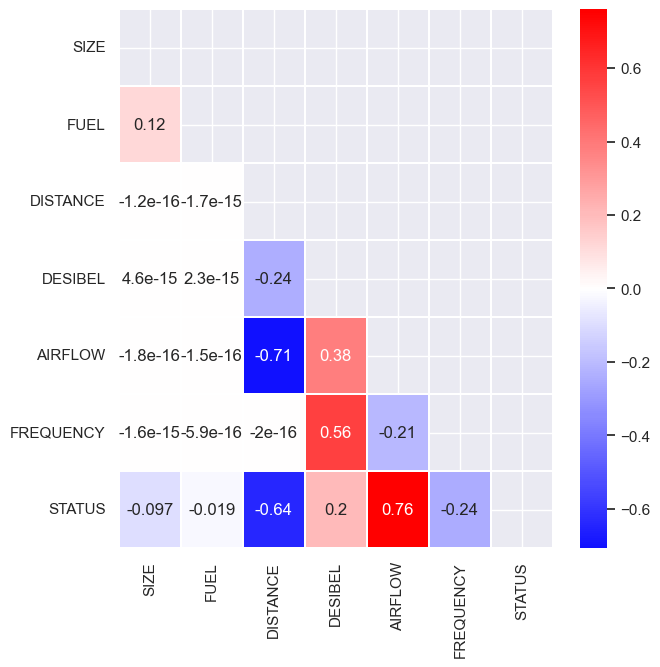

In [175]:
correlation = df.corr()
correlation
import numpy as np

mask = np.zeros_like(correlation)
np.fill_diagonal(mask, True)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(7, 7))

sns.heatmap(correlation, annot=True, cmap='bwr',center=0 ,linewidths=0.2,mask=mask)

plt.show()

After plotting and analyzing the heatmap, we them model the data we find most suitable for it, and apply 5 different algorithms on it.

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
X=df.drop(['STATUS'],axis=1)
y=df['STATUS']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

NEURAL-NETWORKS

In [177]:
import tensorflow as tf
from sklearn.metrics import accuracy_score

# Define the number of features in your input data
input_dim = X_train.shape[1]
output_dim = 1

# Define the neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(output_dim, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the test set
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Reshape Y_train and Y_test if needed
if len(y_train.shape) == 1:
    y_train = np.reshape(y_train, (-1, 1))
if len(y_test.shape) == 1:
    y_test = np.reshape(y_test, (-1, 1))
neuralnetaccscore = accuracy_score(y_test, Y_pred_classes)

print("Neural Networks Accuracy:", neuralnetaccscore)

Epoch 1/10


c:\Users\diogl\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


437/437 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4985
Epoch 2/10
437/437 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4985
Epoch 3/10
437/437 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4985
Epoch 4/10
437/437 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4985
Epoch 5/10
437/437 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4985
Epoch 6/10
437/437 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4985
Epoch 7/10
437/437 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4985
Epoch 8/10
437/437 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4985
Epoch 9/10
437/437 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4985
Epoch 10/10
110/110 [==============================] - 0s 919us/step
Neural

DECISION TREE

In [178]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier()
classifier1.fit(X_train,y_train.ravel())
y_pred = classifier1.predict(X_test)

In [179]:
decisiontreeaccscore = accuracy_score(y_test,y_pred)
print("Decision Tree Accuracy:", decisiontreeaccscore)

Decision Tree Accuracy: 0.9647463456577816


NAIVE-BAYES

In [180]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train.ravel())
y_pred = gnb.predict(X_test)

In [181]:
naivebayesaccscore = accuracy_score(y_test,y_pred)
print("Naive-Bayes Accuracy:", naivebayesaccscore)

Naive-Bayes Accuracy: 0.8678704499856692


K-NN

In [182]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train.ravel())
y_pred = knn.predict(X_test)

In [183]:
knnaccscore = accuracy_score(y_test,y_pred)
print("K-NN Accuracy:", knnaccscore)

K-NN Accuracy: 0.9650329607337346


SVM

In [184]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train.ravel())
y_pred = svc.predict(X_test_scaled)


In [185]:
svmaccscore = accuracy_score(y_test,y_pred)
print("SVM Accuracy:", svmaccscore)

SVM Accuracy: 0.939524218973918


COMPARISON TABLE

We proceed to compare the 5 different algorithms we developed in order to find the most and least accurate one

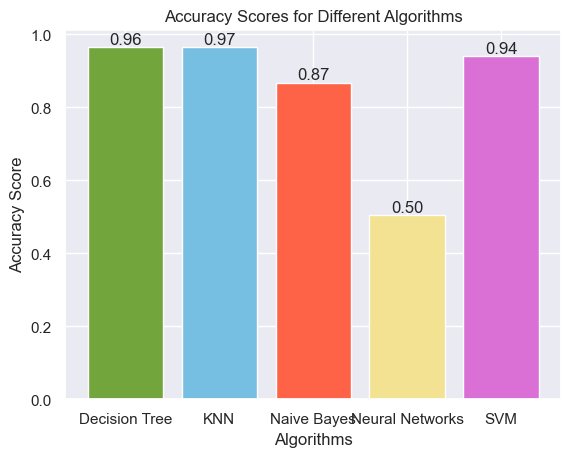

In [186]:
import matplotlib.pyplot as plt

# Accuracy scores list
accuracy_scores = [decisiontreeaccscore,knnaccscore, naivebayesaccscore, neuralnetaccscore, svmaccscore]

# Algorithm names
algorithms = ['Decision Tree','KNN', 'Naive Bayes', 'Neural Networks', 'SVM']

# Plotting the histogram
plt.bar(algorithms, accuracy_scores, color = ['#72A63D','#77BFE2','tomato','#f2e291', 'orchid'] )
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Algorithms')
plt.show()

As we can see the decision tree and the k-nn are the best at predicting and svm comes a close third. the naives bayes is the fourth and last by a long margin is the neural networks 